In [2]:
import ergom
from scipy.integrate import solve_ivp
from matplotlib import pyplot as plt

In [3]:
model = ergom.ERGOM()

DEPTH = 10.0

model.I_0 = 50.0
model.par = 10.0
model.temp = 15.0
model.salt = 35.0
model.wind = 5.0
model.taub = 0.0

# disable non-conservative processes
model.s1    = 0.0
model.r3max = 0.0

In [4]:
def f(t, y):
    model.state = y
    model.reset_sources()
    model.process_interior()
    #model.process_bottom()
    #model.process_surface()
    dy = model.sources.copy()
    bfl = model.bottom_fluxes
    sfl = model.surface_fluxes
    dy[: bfl.shape[0]] += (bfl + sfl) / DEPTH
    return dy * 86400.0


res = solve_ivp(f, [0.0, 100.0], model.state, max_step=0.1)

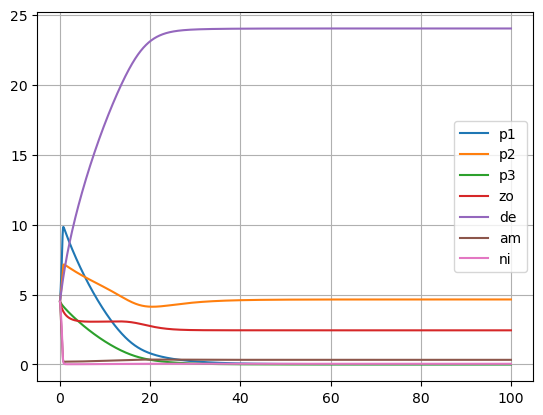

In [5]:
fig, ax = plt.subplots()
for i, n in enumerate(model.state_variables):
    if n not in ("o2", "po", "fl"):
        ax.plot(res.t, res.y[i, :], label=n)
ax.grid()
ax.legend()

In [6]:
sum = 0.0
for i, (n, v) in enumerate(model.state_variables.items()):
    values = res.y[i, :]
    if n not in ("o2", "po"):
        if isinstance(v, ergom.InteriorStateVariable):
            print(v.long_name)
            sum += values * DEPTH
        else:
            sum += values
print(sum)

diatoms
flagellates
cyanobacteria
zooplankton
detritus
ammonium
nitrate
[315. 315. 315. ... 315. 315. 315.]
